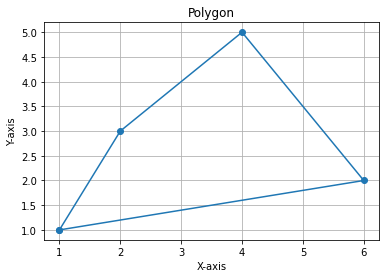

In [1]:
import matplotlib.pyplot as plt

# Define the x and y coordinates of the vertices
x_coords = [1, 2, 4, 6, 1]  # Example x coordinates
y_coords = [1, 3, 5, 2, 1]  # Example y coordinates

# Plot the polygon
plt.plot(x_coords, y_coords, marker='o', linestyle='-')
plt.title('Polygon')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


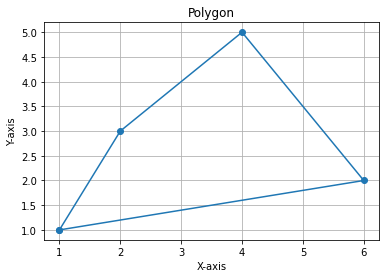

In [2]:
import matplotlib.pyplot as plt

# Define the vertices of the polygon
vertices = [(1, 1), (2, 3), (4, 5), (6, 2), (1, 1)]

# Extract x and y coordinates from vertices
x = [vertex[0] for vertex in vertices]
y = [vertex[1] for vertex in vertices]

# Plot the polygon
plt.plot(x, y, marker='o')  # 'o' for marking the vertices
plt.title('Polygon')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

---

## Checking anotations/polygons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from helpers import *

In [2]:
folder='WSI' #path a la folder con los xml
files = filenames(folder)
files

['I-2021-4001 A3.xml',
 'I-2021-5616 B6.xml',
 'I-2021-5616 A2.xml',
 'I-2021-5616 A4.xml',
 'I-2021-4001 A4.xml',
 'I-2021-5616 A3.xml',
 'I-2021-5616 A1.xml']

In [3]:
poligonales = get_vert(os.path.join(folder,files[0])) #obtiene los poligonos sobre 1 solo archivo
len(poligonales)

18

In [4]:
for p in poligonales: #cantidad de vertices para cada poligono en el archivo escogido
    print(len(p))

553
496
800
213
240
473
1392
1098
90
458
922
220
224
253
1010
666
217
394


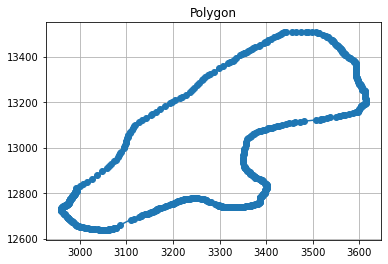

In [34]:
def graficar(pol):
    x,y = get_xy(pol)
    plt.plot(x, y, marker='o')  # 'o' = vertices
    plt.title('Polygon')
    plt.grid(True)
    #plt.savefig('./a/aa.png') #pa gaurdar asi debo crear la carpeta antes
    plt.show()
    
    
graficar(poligonales[15])

------

In [5]:
dic = get_all_vert(folder)
dic.keys() 

dict_keys(['I-2021-4001 A3.xml', 'I-2021-5616 B6.xml', 'I-2021-5616 A2.xml', 'I-2021-5616 A4.xml', 'I-2021-4001 A4.xml', 'I-2021-5616 A3.xml', 'I-2021-5616 A1.xml'])

In [6]:
[len(dic[file]) for file in files]  #cantidad de poligonos en cada file

[18, 2, 2, 5, 10, 4, 3]

In [7]:
sum([len(dic[file]) for file in files]) #poligonos en total

44

/tmp/ipykernel_7890/3816249726.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


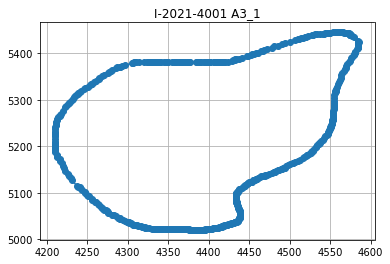

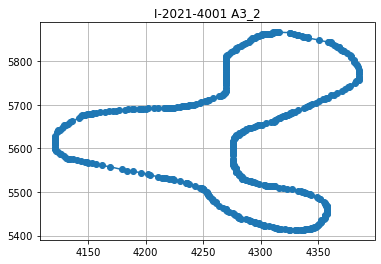

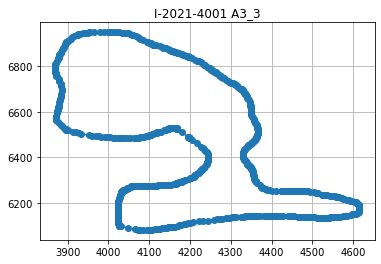

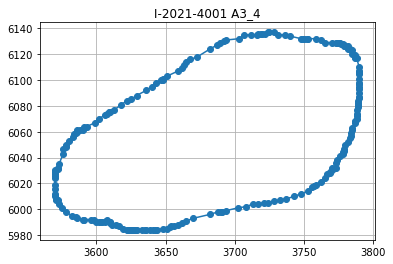

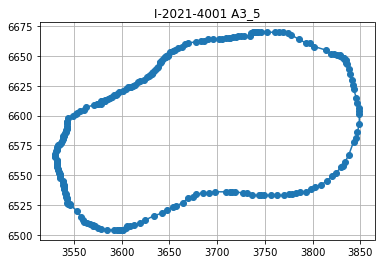

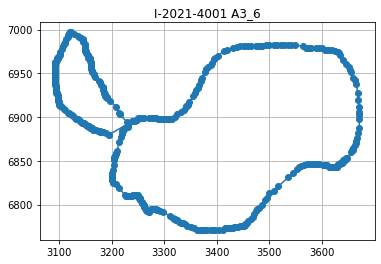

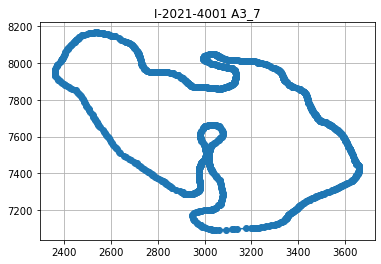

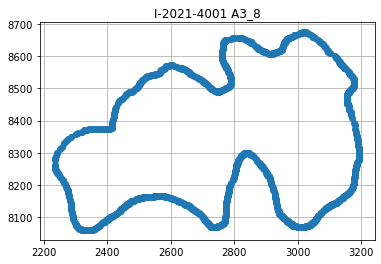

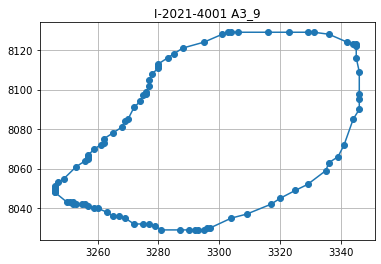

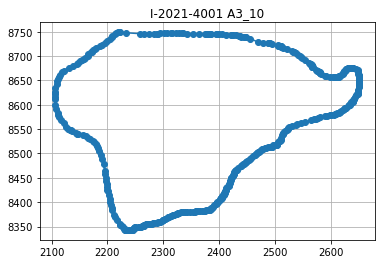

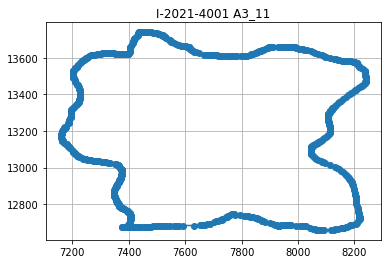

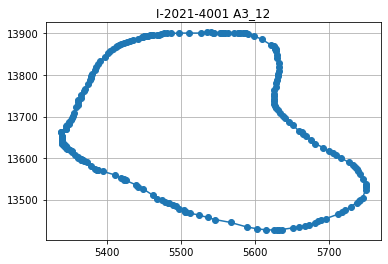

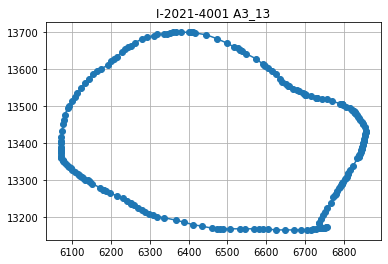

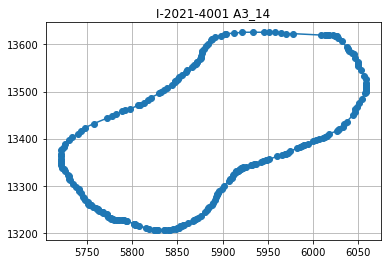

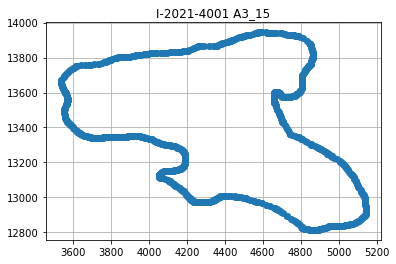

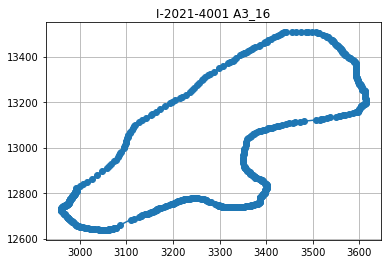

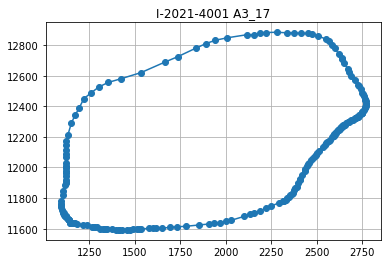

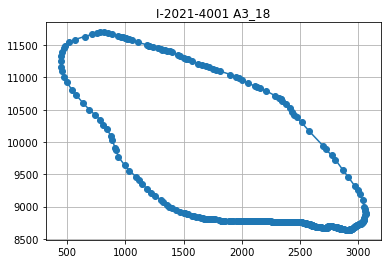

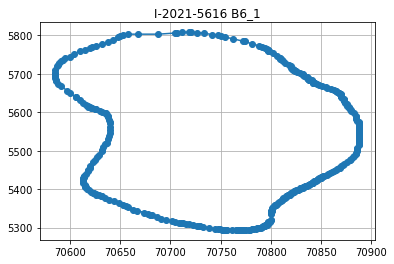

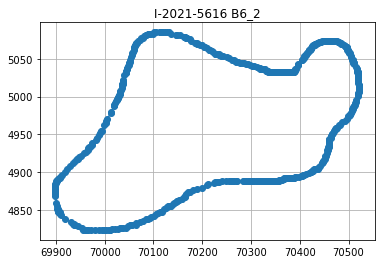

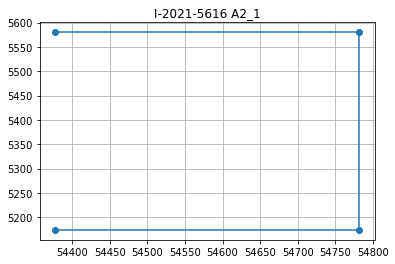

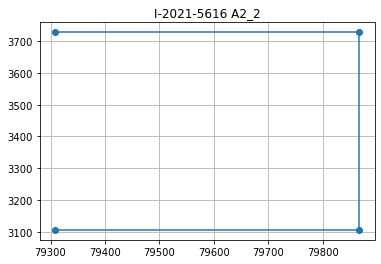

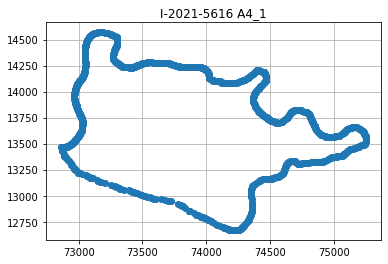

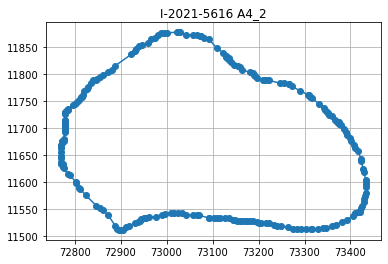

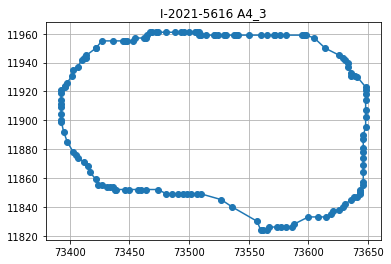

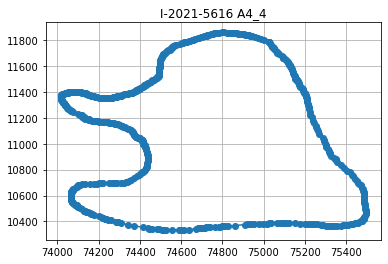

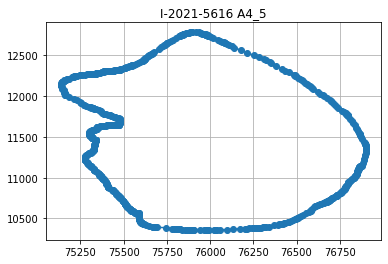

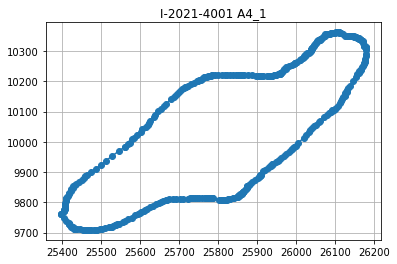

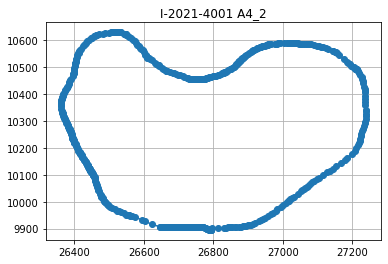

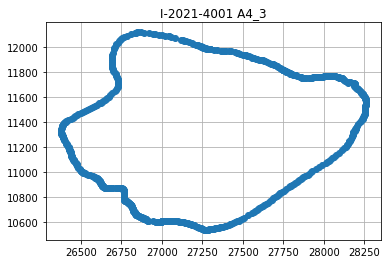

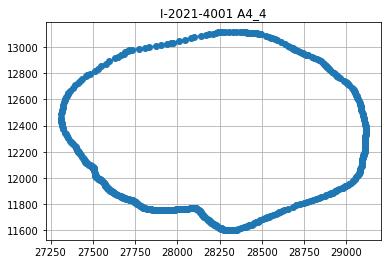

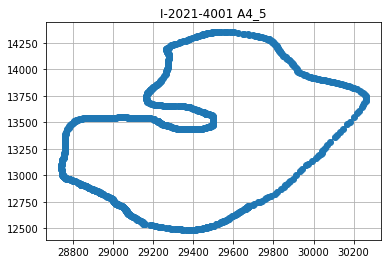

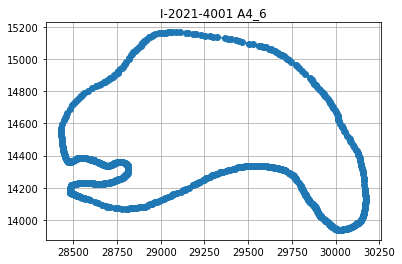

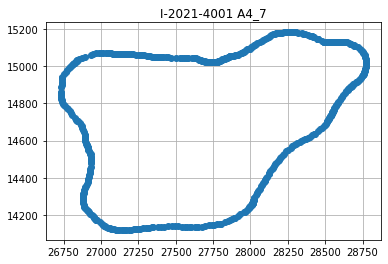

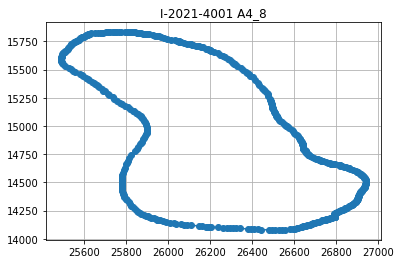

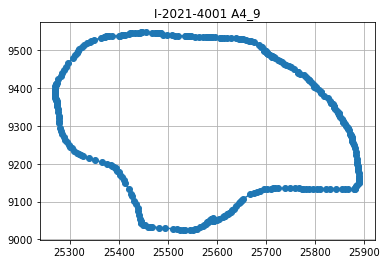

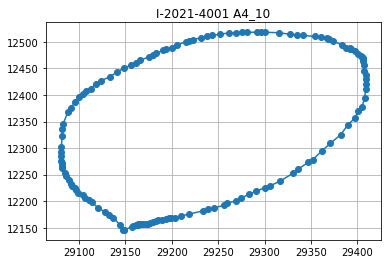

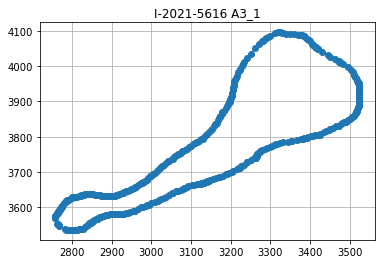

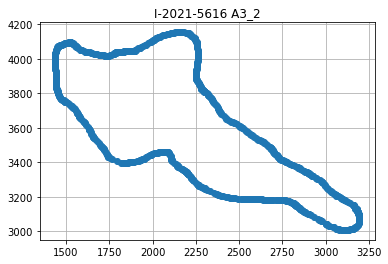

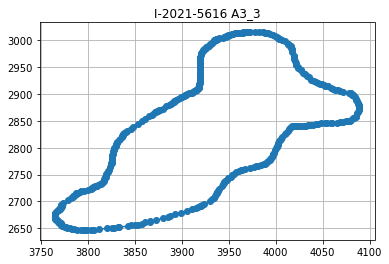

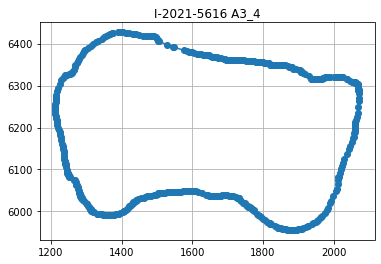

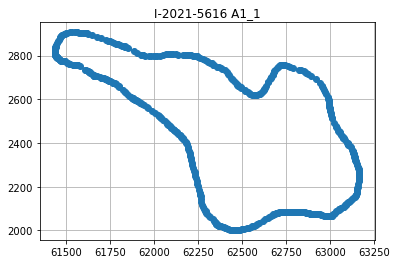

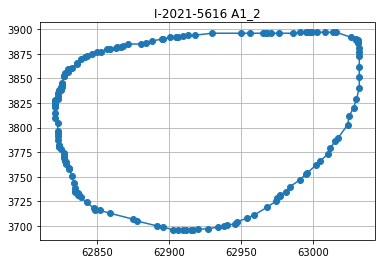

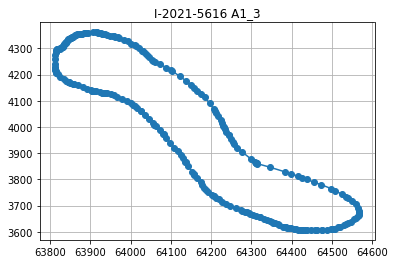

In [52]:
for file in files:
    i=0
    for pol in dic[file]:
        i += 1
        x,y = get_xy(pol)
        plt.figure()
        plt.plot(x, y, marker='o')  # 'o' = vertices
        plt.title(file[:-4]+'_'+str(i))
        plt.grid(True)
        plt.savefig('./a/'+file[:-4]+'_'+str(i)+'.png')
        

----

In [11]:
files

['I-2021-4001 A3.xml',
 'I-2021-5616 B6.xml',
 'I-2021-5616 A2.xml',
 'I-2021-5616 A4.xml',
 'I-2021-4001 A4.xml',
 'I-2021-5616 A3.xml',
 'I-2021-5616 A1.xml']

In [17]:
len(dic[files[0]][8]) #la imagen I-2021-4001 A3_9
#type(dic[files[0]][8])

90

## Checking intersections

In [36]:
from shapely.geometry import Polygon, Point

def check_intersection(square_vertices, polygon_vertices):
    square = Polygon(square_vertices)
    polygon = Polygon(polygon_vertices)
    if square.intersects(polygon):
        print("Square intersects the polygon")
    else:
        print("Square does not intersect the polygon")

def sq_vert( vert, dims ): # bottom-left +(width, height)
    return [vert, (vert[0]+dims[0], vert[1]), (vert[0]+dims[0], vert[1]+dims[1]), (vert[0], vert[1]+dims[1])]

#square_vertices = sq_vert((3240,8100), (20,20))
#square_vertices = sq_vert((3280,8060), (20,20))
square_vertices = sq_vert((3320,8080), (20,20))
#square_vertices = sq_vert((3320,8020), (20,20))
#square_vertices = sq_vert((3340,8060), (20,20))
polygon_vertices = dic[files[0]][8]

check_intersection(square_vertices, polygon_vertices) #funciona bien!

Square intersects the polygon


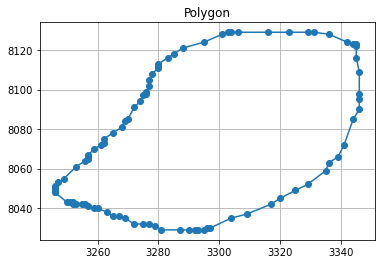

In [35]:
graficar(dic[files[0]][8])

unos parece q son cuadrados

In [44]:
#square_vertices = sq_vert((79400,3200), (100,100))
square_vertices = sq_vert((79800,3200), (100,100))
polygon_vertices = dic[files[2]][1]

check_intersection(square_vertices, polygon_vertices)

Square intersects the polygon


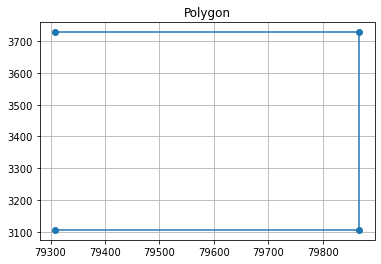

In [41]:
#graficar(dic[files[2]][0])
graficar(dic[files[2]][1])